#Exploratory Data Analysis


In [ ]:
!pip install inline
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for inline: filename=inline-0.0.1-py3-none-any.whl size=3307 sha256=4cff6eeadf20c43dcac3b0068b7810330f8d6723d9a44837ce7b3f0886c2f988
  Stored in directory: /root/.cache/pip/wheels/13/53/fd/b0680d68834fea748095b966e089579a49cb636dcaa98f3682
Successfully built inline
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import inline
import pandas as pd
import seaborn as sns
sns.set(style = "ticks")
from sklearn.feature_extraction.text import CountVectorizer
from skimage.io import imread, imshow

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##One hot encoding for all the categorical variables

In [ ]:
pd.get_dummies(titanic, columns=["embarked"]).head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,False,True
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,False,True


In [ ]:
titanic_num = pd.get_dummies(titanic, columns = ["sex","embarked","fare","class","who","adult_male","deck","embark_town","alive","alone"])
titanic_num.shape

(891, 280)

###Other feature types: Text Data -- Bag of words

In [ ]:
text = "My name is Sahan Sharma. I am studying computer science. I am interesting in building interesting technologies. I am learning and trusting the process."

In [ ]:
cv = CountVectorizer()
feat = cv.fit_transform([text])

In [ ]:
for word, idx in cv.vocabulary_.items():
  print("%-14s%d" % (word, feat[0,idx]))

my            1
name          1
is            1
sahan         1
sharma        1
am            3
studying      1
computer      1
science       1
interesting   2
in            1
building      1
technologies  1
learning      1
and           1
trusting      1
the           1
process       1


##Other feature types: images

<ipython-input-16-fb6f1ff45e97>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img);


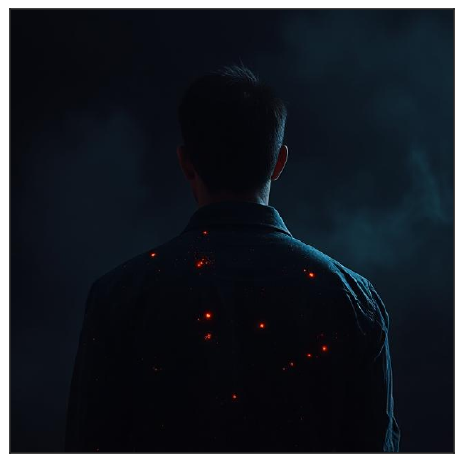

In [ ]:
img = imread("https://avatars.githubusercontent.com/u/105370268?v=4")
plt.xticks([])
plt.yticks([])
imshow(img);

In [ ]:
img.shape

(460, 460, 3)

In [ ]:
img[:2, :2, :]

array([[[ 8,  9, 14],
        [ 8,  9, 14]],

       [[ 8,  9, 14],
        [ 8,  9, 14]]], dtype=uint8)

In [ ]:
img.flatten().shape

(634800,)

##Data Cleaning
- Ways that data maynot be clean
  -noise, outliers, missing_values, duplicate_data

##Feature_Aggregation
1. Combine features to form new ones
2. Useful if there are few examples of particular case

In [ ]:
titanic['deck'].value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [ ]:
titanic_agg = titanic.copy()
titanic_agg["upper"] = titanic_agg["deck"].isin(("A", "B"))
titanic_agg.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,upper
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,False
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,False


In [ ]:
titanic_id = titanic.copy()
titanic_id['id'] = titanic_id.index
titanic_id.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,id
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,4


##Feature Transformation
- Binning(Discretization): Turn numerical data into categorical


In [ ]:
titanic['age'].head()

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:
ages = pd.cut(titanic['age'], bins = (0, 20, 30,100))
ages_cat = pd.get_dummies(ages)
pd.concat([titanic['age'], ages_cat], axis=1).head()

,age,"(0, 20]","(20, 30]","(30, 100]"
0,22.0,False,True,False
1,38.0,False,False,True
2,26.0,False,True,False
3,35.0,False,False,True
4,35.0,False,False,True


In [ ]:
titanic_mod = titanic.copy()
titanic_mod['fare'] = np.sqrt(titanic_mod['fare'])
titanic_mod['fare'].head()

,fare
0,2.692582
1,8.442944
2,2.815138
3,7.286975
4,2.837252


###Categorical Summary Statistics
*   Frequencies
*   Mode

In [ ]:
titanic['deck'].value_counts(normalize=True)

,proportion
deck,
C,0.290640
B,0.231527
D,0.162562
E,0.157635
A,0.073892
F,0.064039
G,0.019704


In [ ]:
titanic['deck'].mode()[0]

'C'

# Continuos Summary Statistics


1.   Measure of Location
*   Mean
*   Median
*   Quantiles

2.   Measure of Spread
*   Range
*   Variance (Sq-root of standard deviation)
*   Interquartile Ranges

In [ ]:
titanic['fare'].mean()

np.float64(32.204207968574636)

In [ ]:
titanic['fare'].median()

14.4542

In [ ]:
titanic['fare'].quantile((0.25,0.5,0.75))

,fare
0.25,7.9104
0.50,14.4542
0.75,31.0000


In [ ]:
titanic['fare'].min()

0.0

In [ ]:
titanic['fare'].max()

512.3292

In [ ]:
titanic['fare'].var()

2469.436845743117

In [ ]:
titanic['fare'].std()

49.693428597180905

In [ ]:
# Code below from seaborn documentation: https://seaborn.pydata.org/examples/anscombes_quartet.html

# Load the example dataset for Anscombe's quartet
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


- Almost same means.
- Almost same variances.
- Almost same correlations.
- Almost same linear fits.
- Look completely different.

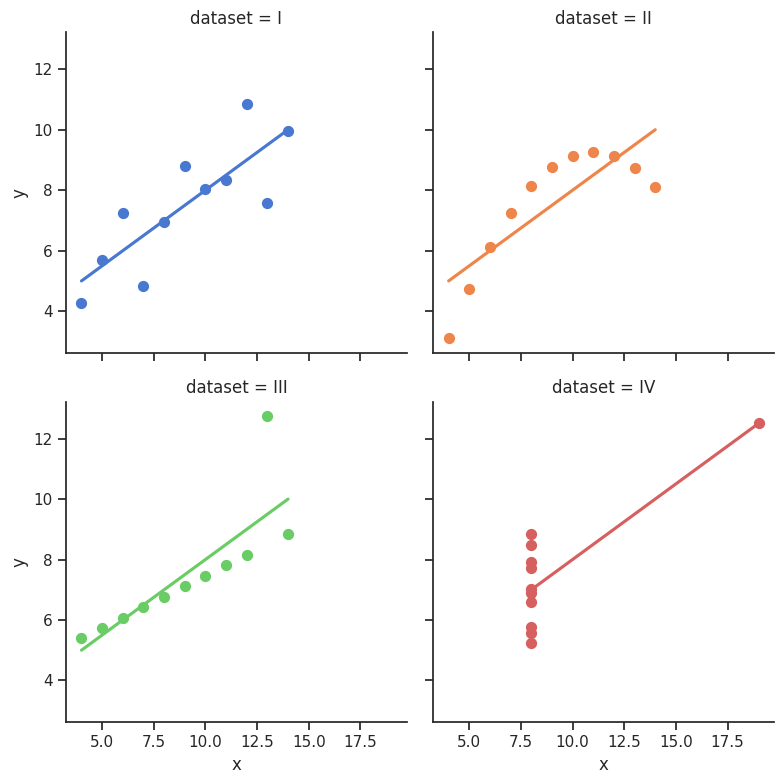

In [ ]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1});

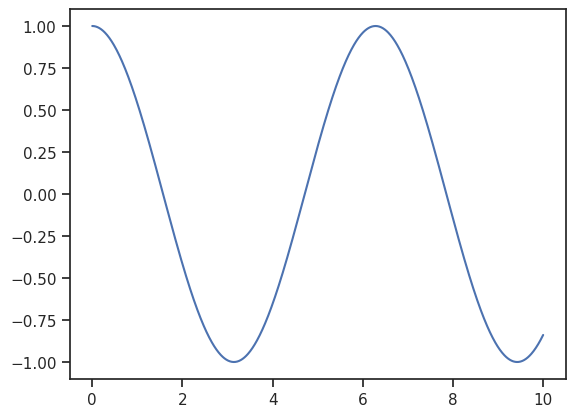

In [ ]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.cos(x))

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram

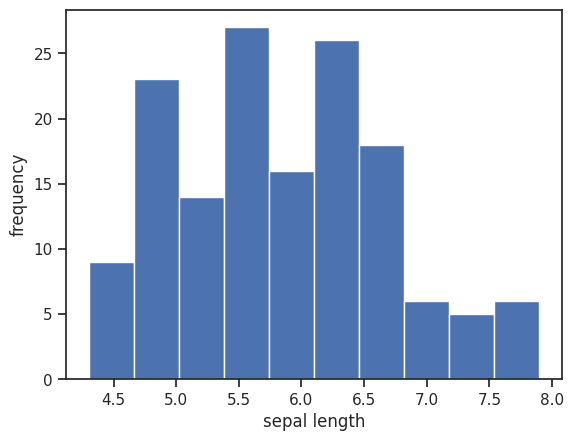

In [ ]:
plt.hist(iris['sepal_length'])
plt.xlabel('sepal length')
plt.ylabel('frequency');

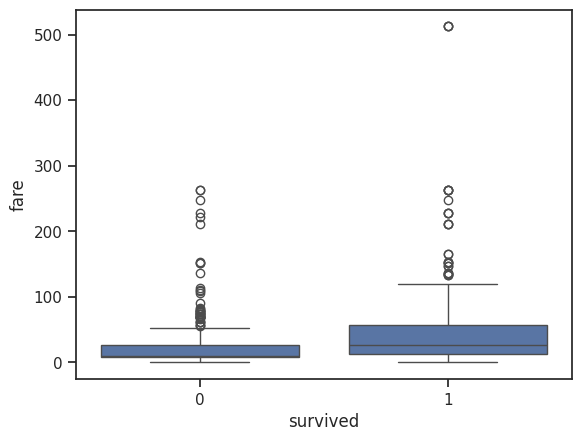

In [ ]:
sns.boxplot(x="survived", y="fare", data=titanic);

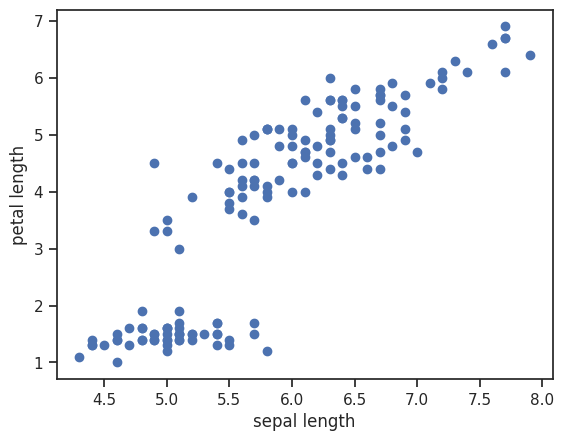

In [ ]:
plt.scatter(iris['sepal_length'], iris['petal_length'])
plt.xlabel('sepal length')
plt.ylabel('petal length');

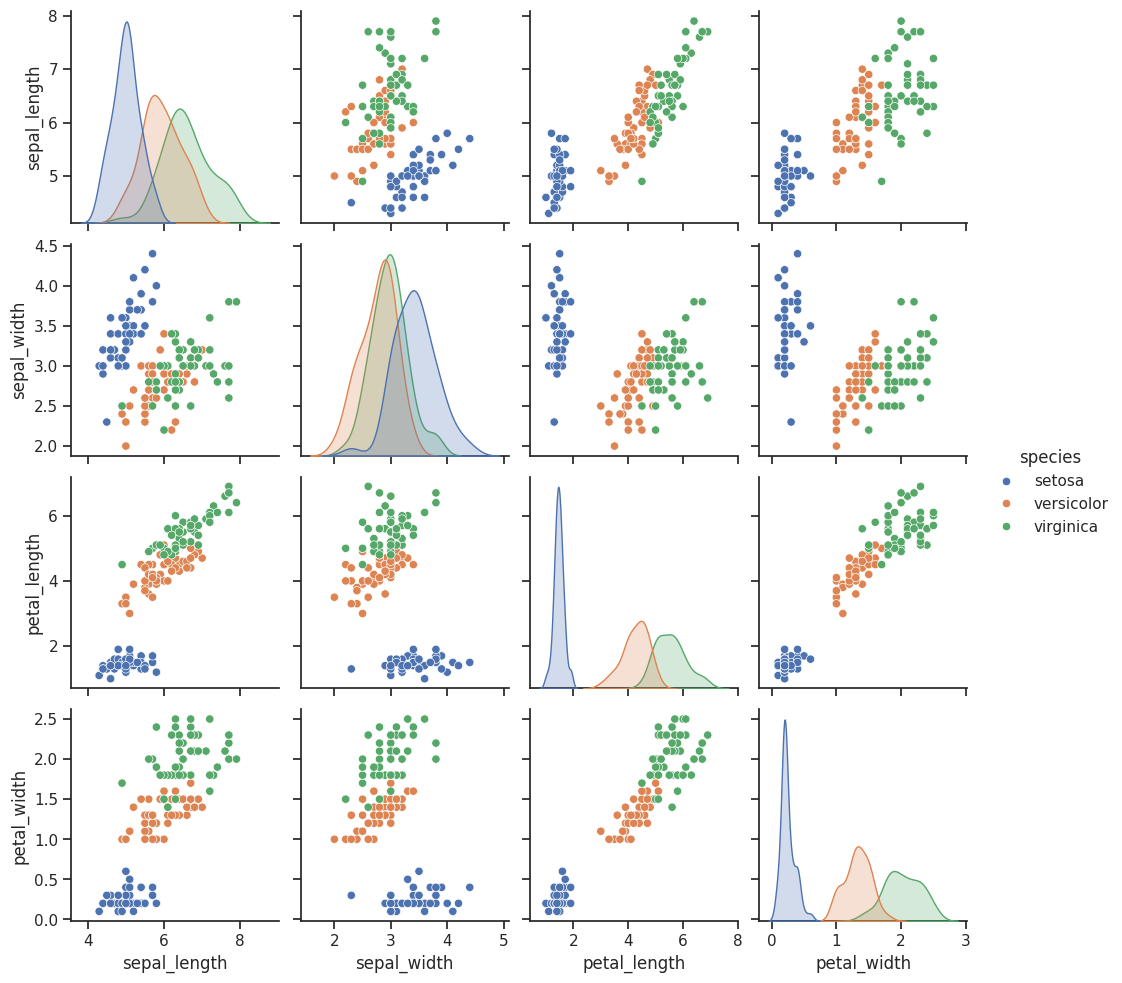

In [ ]:
sns.pairplot(iris, hue="species");

## Summary
Typical data mining steps involve data collection, preprocessing, analysis, and evaluation. This includes representing objects with features and distinguishing between categorical and numerical data. Transforming non-vector objects into vector representations is crucial. Feature transformations are used to simplify relationships between variables, such as addressing coupon collecting. Data exploration involves summary statistics and visualization techniques, with additional methods covered in the post-lecture bonus slides.